Импортируем необходимые библиотеки:

In [21]:
import pandas as pd
# from pprint import pprint
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import numpy as np

# Шаг 2: сбор данных

### Данные взяты с сайта kaggle.com

https://www.kaggle.com/datasets/utkarshx27/smoking-dataset-from-uk/data

# Шаг 3: Предварительная обработка

In [22]:
base_df = pd.read_csv('smoking.csv', index_col=0)
base_df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [23]:
print("В нашем датасете " + str(base_df.shape[0]) + " строк и " + str(base_df.shape[1]) + " колонок.")

В нашем датасете 1691 строк и 12 колонок.


Посмотрим на тип данных в каждой из колонок:

In [24]:
print(base_df.dtypes)

gender                    object
age                        int64
marital_status            object
highest_qualification     object
nationality               object
ethnicity                 object
gross_income              object
region                    object
smoke                     object
amt_weekends             float64
amt_weekdays             float64
type                      object
dtype: object


## Описание колонок датафрейма

### 1. gender
- **Описание**: Пол человека.
- **Тип данных**: Текстовая колонка.

### 2. age
- **Описание**: Возраст человека.
- **Тип данных**: Числовая колонка.

### 3. marital_status
- **Описание**: Семейный статус.
- **Тип данных**: Текстовая колонка.

### 4. highest_qualification
- **Описание**: Наивысшая академическая квалификация.
- **Тип данных**: Текстовая колонка.

### 5. nationality
- **Описание**: Национальность человека, указывающая на страну происхождения или национальную принадлежность.
- **Тип данных**: Текстовая колонка.

### 6. ethnicity
- **Описание**: Этническая принадлежность человека.
- **Тип данных**: Текстовая колонка.

### 7. gross_income
- **Описание**: Годовой валовой доход человека.
- **Тип данных**: Числовая колонка.

### 8. region
- **Описание**: Регион проживания человека.
- **Тип данных**: Текстовая колонка.

### 9. smoke
- **Описание**: Курит ли человек.
- **Тип данных**: Текстовая колонка.

### 10. amt_weekends
- **Описание**: Среднее количество часов, проведенных в определенной деятельности в выходные дни.
- **Тип данных**: Числовая колонка.

### 11. amt_weekdays
- **Описание**: Среднее количество часов, проведенных в определенной деятельности в будние дни.
- **Тип данных**: Числовая колонка.

### 12. type
- **Описание**: Тип деятельности, к которой относятся данные о времени, проведенном в выходные и будни.
- **Тип данных**: Текстовая колонка.

Посмотрим на число значений в каждой из колонок:

In [25]:
missing_values = base_df.isnull().sum()

print("Количество пустых значений по колонкам:")
for column, value in missing_values.items():
    print(f"{column}: {value}")

Количество пустых значений по колонкам:
gender: 0
age: 0
marital_status: 0
highest_qualification: 0
nationality: 0
ethnicity: 0
gross_income: 0
region: 0
smoke: 0
amt_weekends: 1270
amt_weekdays: 1270
type: 1270


Посмотрим на число уникальных значений в каждой из колонок:

In [26]:
print(base_df.nunique())

gender                    2
age                      79
marital_status            5
highest_qualification     8
nationality               8
ethnicity                 7
gross_income             10
region                    7
smoke                     2
amt_weekends             24
amt_weekdays             24
type                      4
dtype: int64


In [27]:
print("Уникальные значения в нечисловых колонках:")
for column in base_df.columns:
    if base_df[column].dtype == 'object':
        unique_values = base_df[column].unique()
        filtered_values = [value for value in unique_values if pd.notna(value)]
        print(f"\nКолонка '{column}':")
        print(f"Количество уникальных значений: {len(filtered_values)}")
        print(tabulate([[value] for value in filtered_values], headers=[column], tablefmt='grid'))

Уникальные значения в нечисловых колонках:

Колонка 'gender':
Количество уникальных значений: 2
+----------+
| gender   |
+==========+
| Male     |
+----------+
| Female   |
+----------+

Колонка 'marital_status':
Количество уникальных значений: 5
+------------------+
| marital_status   |
+==================+
| Divorced         |
+------------------+
| Single           |
+------------------+
| Married          |
+------------------+
| Widowed          |
+------------------+
| Separated        |
+------------------+

Колонка 'highest_qualification':
Количество уникальных значений: 8
+-------------------------+
| highest_qualification   |
+=========================+
| No Qualification        |
+-------------------------+
| Degree                  |
+-------------------------+
| GCSE/O Level            |
+-------------------------+
| GCSE/CSE                |
+-------------------------+
| Other/Sub Degree        |
+-------------------------+
| Higher/Sub Degree       |
+------------------

### Разберемся с пустыми значениями. 

1. В amt_weekends, amt_weekdays и type по 1270 пропущенных значений. Пропусков больше, чем значений, и на текущем этапе мы не будем использовать эти колонки. Создадим датафрейм без этих колонок.

In [28]:
df_pp = base_df.drop(columns=['amt_weekends', 'amt_weekdays', 'type'])
df_pp.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No
2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes
3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No
4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No
5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No


2. Теперь обратим внимание на значения 'Unknown' и 'Refused' для некоторых из признаков. 

- Значение 'Refused' - выделяет отдельную группу людей. Сам по себе отказ делиться какой-то информацией может в теории оказаться признаком курильщика, и наоборот.

- А вот значение 'Unknown' - равносильно пропущенному. Посмотрим, сколько у нас таких значений в колонках:

In [29]:
for col in ['nationality', 'ethnicity', 'gross_income']:
    print(col, ': ', sum(df_pp[col] == 'Unknown'))

nationality :  1
ethnicity :  2
gross_income :  18


В случае национальности и этнической принадлежности - мы можем спокойно убрать строки где они - 'Unknown', из рассмотрения - их всего 3 штуки. Для gross_income, однако, можно было бы заполнить значение с помощью предсказанного. Для этого можно:

- Обучить логистическую регрессию на нашем датасете, не вкючая колонку 'smoking', во избежание эндогенности зависимой переменной итоговой модели.
- Предсказать значения для Unknown.


In [30]:
df_pp = df_pp[(df_pp['nationality'] != 'Unknown') & (df_pp['ethnicity'] != 'Unknown')]
df_pp

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No
2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes
3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No
4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No
5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No
...,...,...,...,...,...,...,...,...,...
1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No
1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes
1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No
1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes


In [31]:
label_encoders = {}
for column in df_pp.select_dtypes(include=['object']).columns:
    if column != 'smoke':
        le = LabelEncoder()
        if column == 'gross_income':
            df_pp[column] = df_pp[column].replace('Unknown', pd.NA)
        df_pp[column] = le.fit_transform(df_pp[column].fillna('Missing'))
        label_encoders[column] = le

known_data = df_pp.dropna(subset=['gross_income'])
unknown_data = df_pp[df_pp['gross_income'].isna()]
X = known_data.drop(['gross_income', 'smoke'], axis=1)
y = known_data['gross_income']
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
if not unknown_data.empty:
    X_unknown = unknown_data.drop(['gross_income', 'smoke'], axis=1)
    predicted_values = model.predict(X_unknown)
    df_pp.loc[df_pp['gross_income'].isna(), 'gross_income'] = predicted_values

# Обратное преобразование всех категориальных колонок
for column, le in label_encoders.items():
    if column in df_pp:
        df_pp[column] = le.inverse_transform(df_pp[column])

df_pp.head()

/Users/dmvenevtsev/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No
2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes
3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No
4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No
5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No


In [32]:
print('gross_income', ': ', sum(df_pp['gross_income'] == 'Unknown'))

gross_income :  0


# Шаг 4. Визуализация

### Построение корреляционной матрицы с помощью, например, коэффициента Пирсона применяется к числовым переменным. Для категориальных признаков требуются другие подходы, так как обычная корреляция Пирсона не подходит для измерения взаимосвязей между номинальными переменными.

### Подойдет Cramer's V: Это мера ассоциации для номинальных масштабов, которая предоставляет значения от 0 (отсутствие ассоциации) до 1 (полная ассоциация). Она основана на статистике Хи-квадрат и может быть использована для построения матрицы ассоциаций для категориальных переменных.

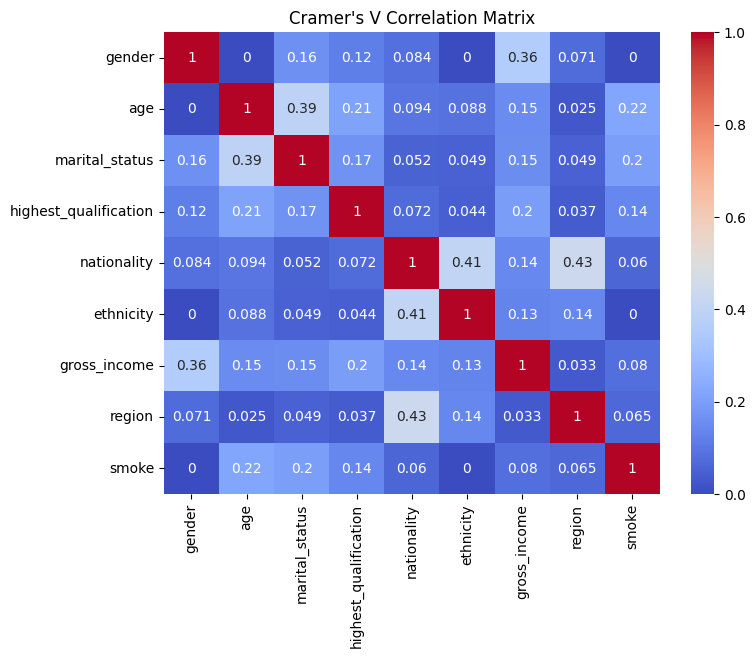

In [33]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Расчет матрицы Крамера
cols = df_pp.columns
corr = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
for col1 in cols:
    for col2 in cols:
        corr.loc[col1, col2] = cramers_v(df_pp[col1], df_pp[col2])

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Cramer\'s V Correlation Matrix')
plt.show()

Матрица показывает множество интересных/очевидных взяимосвязей:

1) между полом и уровнем дохода
2) между возрастом и семейным статусом
3) между расой и национальностью
4) между национальностью и регионом

и т. д.

Но нас в первую очередь волнует склонность разных людей к курению. Заметно, что более всего курение ассоциировано с возрастом, ссемейным положением, образованием. Давайте углубимся, и попробуем разобраться, в чем же дело.

График для age: Используем точечный график (scatterplot), показывающий долю курящих для каждого возраста.
Графики для marital_status и highest_qualification: Используем столбчатые диаграммы (barplot), показывающие долю курящих для каждой категории.

In [34]:
df_pp['smoke'] = df_pp['smoke'].map({'Yes': 1, 'No': 0})

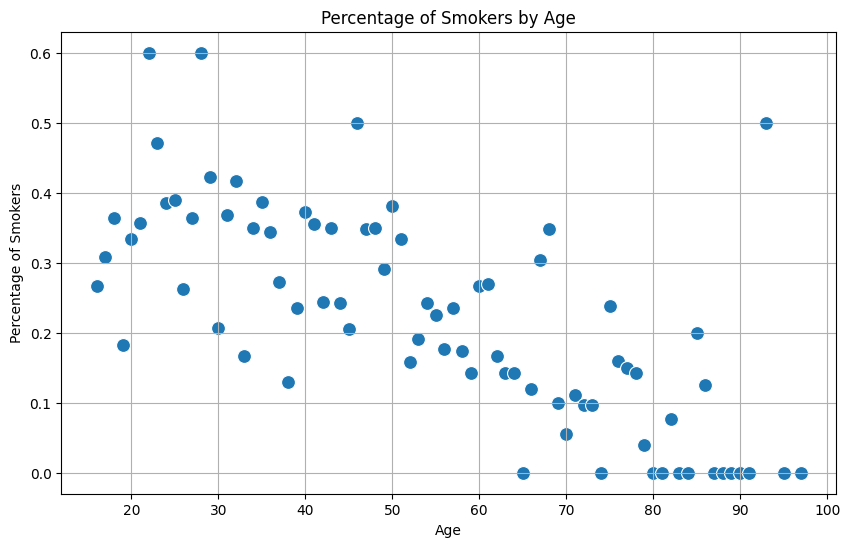

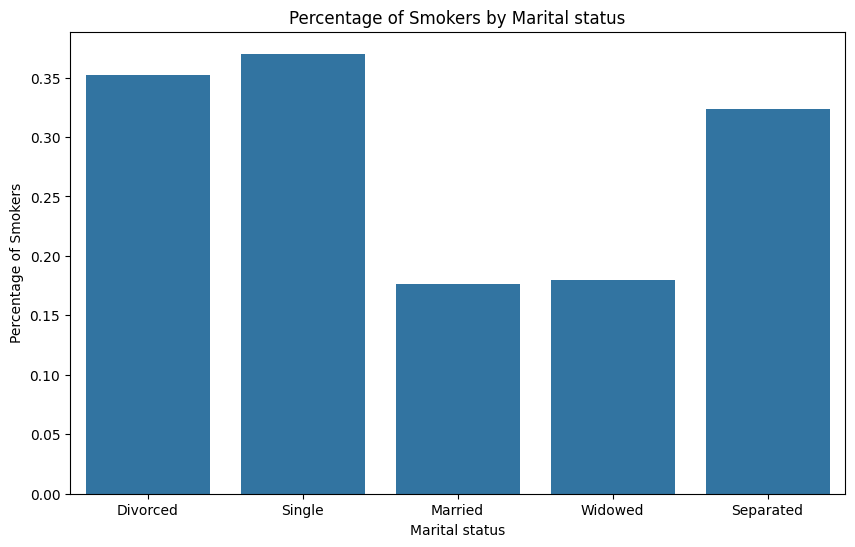

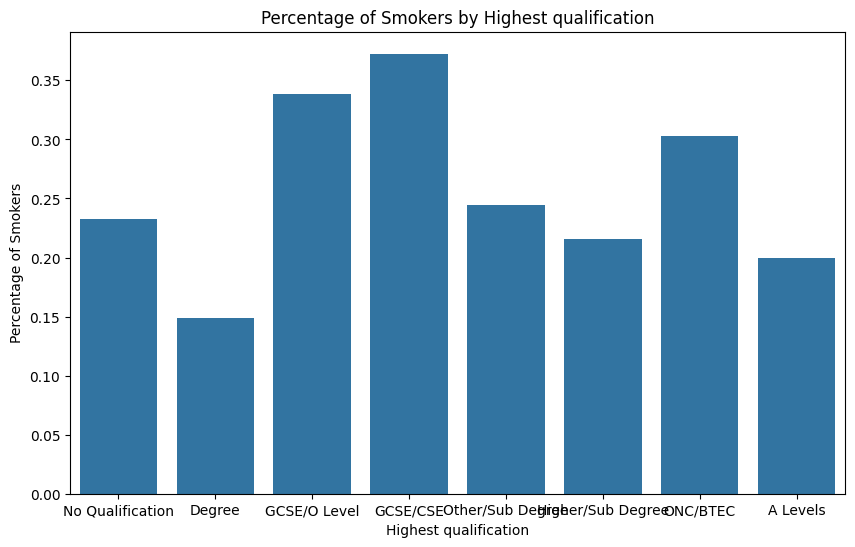

In [35]:
age_smoke = df_pp.groupby('age')['smoke'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_smoke, x='age', y='smoke', s=100)
plt.title('Percentage of Smokers by Age')
plt.xlabel('Age')
plt.ylabel('Percentage of Smokers')
plt.grid(True)
plt.show()

for column in ['marital_status', 'highest_qualification']:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='smoke', data=df_pp, estimator=np.mean, errorbar=None)
    plt.title(f'Percentage of Smokers by {column.capitalize().replace("_", " ")}')
    plt.xlabel(column.capitalize().replace("_", " "))
    plt.ylabel('Percentage of Smokers')
    plt.show()